In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv("/content/data soil.csv")
data.head()

N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29   
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03   
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82   
4  270  9.9  444  7.63  0.40  0.86  11.8  0.25  0.76  1.69  2.43  2.26   

   fertility  
0          0  
1          0  
2          0  
3          0  
4          1

In [18]:
print("Number of classes = ", len(data['fertility'].unique()))

Number of classes =  3


In [19]:
targetData = data['fertility']
inputData = data.drop('fertility', axis=1)

In [20]:
naiveTrainInput, naiveValidationInput, naiveTrainTarget, naiveValidationTarget = train_test_split(inputData, targetData, test_size = 0.2, shuffle=True, random_state = 42)
print("Naive Train Data Shape: ", naiveTrainInput.shape)

Naive Train Data Shape:  (704, 12)


In [21]:
naiveTrainTarget = naiveTrainTarget.values.ravel()


In [22]:
naiveClf = ensemble.RandomForestClassifier()
naiveClf.fit(naiveTrainInput, naiveTrainTarget)

naivePred = naiveClf.predict((naiveValidationInput))

naiveAcc = accuracy_score(naiveValidationTarget, naivePred)

print("Naive Accuracy : ", naiveAcc)


Naive Accuracy :  0.8693181818181818


In [23]:
data = pd.read_csv("/content/Raw Data Soil Fettility.csv")
data.head()

N    P    K    ph    ec    oc     S    zn    fe    cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29   
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03   
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82   
4  220  8.6  444  7.43  0.65  0.72  11.7  0.37  0.66  0.90  2.19  1.82   

   fertility  
0          0  
1          0  
2          0  
3          0  
4          0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


In [25]:
data.describe()

N            P            K           ph           ec  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean    269.061335    17.643478   497.135093     7.549130     0.535893   
std      80.542499    25.303343   120.887088     0.507163     0.134156   
min       6.000000     2.900000    11.000000     0.900000     0.100000   
25%     207.000000     7.200000   422.000000     7.340000     0.430000   
50%     289.000000     9.200000   465.000000     7.500000     0.530000   
75%     333.000000    13.800000   570.000000     7.700000     0.630000   
max     383.000000   125.000000   887.000000    11.150000     0.950000   

                oc            S           zn           fe           cu  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean      0.632174     7.122888     0.442811     4.119185     0.911281   
std       0.720488     4.026723     1.568333     3.028314     0.448782   
min       0.100000     0.640000     0.070000     0.210000     0.090000   
25%       0.390000     4.520000     0.280000     1.360000     0.600000   
50%       0.620000     6.330000     0.360000     3.740000     0.890000   
75%       0.832500     8.450000     0.480000     6.320000     1.250000   
max      24.000000    31.000000    42.000000    44.000000     3.020000   

                Mn            B    fertility  
count  1288.000000  1288.000000  1288.000000  
mean      8.601530     0.611957     1.035714  
std       4.466209     0.560781     0.810938  
min       0.110000     0.060000     0.000000  
25%       6.045000     0.290000     0.000000  
50%       8.540000     0.420000     1.000000  
75%      11.560000     0.650000     2.000000  
max      31.000000     2.820000     2.000000

In [26]:
data['fertility'].value_counts()

fertility
2    447
1    440
0    401
Name: count, dtype: int64

In [27]:
rawDataCopy = data.copy()
rawDataCopy.head()

N    P    K    ph    ec    oc     S    zn    fe    cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0.30  0.86  1.54  2.89  2.29   
2  163  9.6  718  7.59  0.51  1.11  14.3  0.30  0.86  1.57  2.70  2.03   
3  157  6.8  475  7.64  0.58  0.94  26.0  0.34  0.54  1.53  2.65  1.82   
4  220  8.6  444  7.43  0.65  0.72  11.7  0.37  0.66  0.90  2.19  1.82   

   fertility  
0          0  
1          0  
2          0  
3          0  
4          0

In [28]:
labels = rawDataCopy[['fertility']]
features = rawDataCopy.drop('fertility', axis=1)

In [29]:
corr = features.corr()

<Axes: >

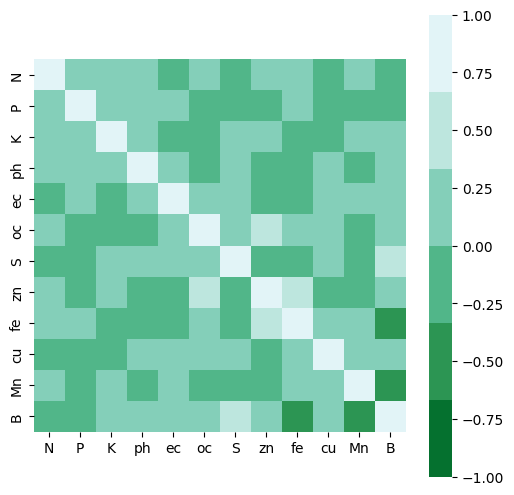

In [30]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.color_palette("BuGn_r"),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

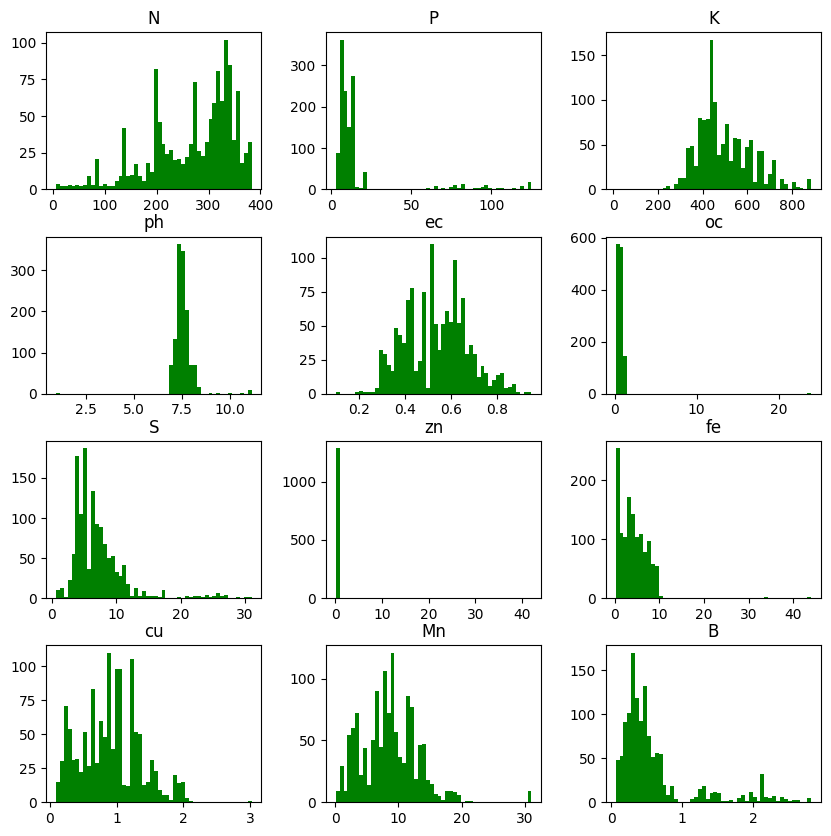

In [31]:
features.head()
labels.head()
features.hist(bins=50, figsize=(10, 10), color ='green', grid=False)
plt.show()

Prepare the Data for Machine Learning Algorithms

In [32]:
transformedFeatures = features.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

In [33]:
print(transformedFeatures.describe())
print(transformedFeatures.isnull().sum())
print((~np.isfinite(transformedFeatures)).sum())


                 N            P            K           ph           ec  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean      2.398578     1.057397     2.683269     0.876427    -0.285482   
std       0.196492     0.328057     0.112810     0.042887     0.115378   
min       0.778151     0.462398     1.041393    -0.045757    -1.000000   
25%       2.315970     0.857332     2.625312     0.865696    -0.366532   
50%       2.460898     0.963788     2.667453     0.875061    -0.275724   
75%       2.522444     1.139879     2.755875     0.886491    -0.200659   
max       2.583199     2.096910     2.947924     1.047275    -0.022276   

                oc            S           zn           fe           cu  \
count  1288.000000  1288.000000  1288.000000  1288.000000  1288.000000   
mean     -0.288375     0.800051    -0.442685     0.464143    -0.109556   
std       0.297206     0.210064     0.175956     0.413534     0.271171   
min      -1.000000    -0.193820    -1

In [34]:
import numpy as np

# Replace inf/-inf with NaN
transformedFeatures = transformedFeatures.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN values
transformedFeatures = transformedFeatures.dropna()

# Alternatively, fill NaN values with a default value (e.g., the mean or median)
transformedFeatures = transformedFeatures.fillna(transformedFeatures.mean())


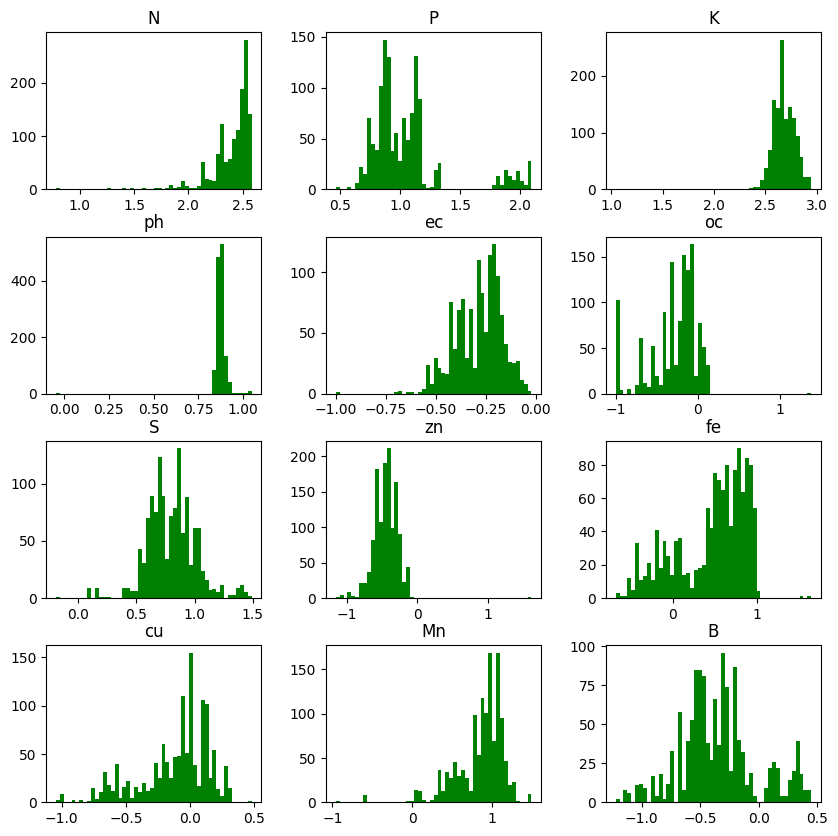

In [35]:
transformedFeatures.hist(bins=50, figsize=(10, 10), color='green', grid=False)
plt.show()

In [36]:
print("Transformed Features Shape: ", transformedFeatures.shape)
print("Labels Shape: ", labels.shape)


Transformed Features Shape:  (1288, 12)
Labels Shape:  (1288, 1)


In [37]:
# Assuming transformedFeatures is a DataFrame
labels = labels.loc[transformedFeatures.index]


In [38]:
transformedFeatures.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)


In [39]:
print("Any missing rows in transformedFeatures?", labels.shape[0] != transformedFeatures.shape[0])


Any missing rows in transformedFeatures? False


In [40]:
trainInput, validationInput, trainTarget, validationTarget = train_test_split(
    transformedFeatures, labels, test_size=0.2, shuffle=True, random_state=42
)

trainTarget = trainTarget.values.ravel()
svcClf = SVC(verbose=1)
svcClf.fit(trainInput, trainTarget)



[LibSVM]

SVC(verbose=1)

In [41]:
forestClf = ensemble.RandomForestClassifier(verbose=1)
forestClf.fit(trainInput, trainTarget)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


RandomForestClassifier(verbose=1)

In [42]:
nbClf = GaussianNB()
nbClf.fit(trainInput, trainTarget)

GaussianNB()

In [43]:
knnClf = KNeighborsClassifier()
knnClf.fit(trainInput, trainTarget)

KNeighborsClassifier()

In [44]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(trainInput, trainTarget)

DecisionTreeClassifier()

SVC  accuarcy is  0.6511627906976745
RandomForestClassifier  accuarcy is  0.9689922480620154
GaussianNB  accuarcy is  0.5736434108527132
KNeighborsClassifier  accuarcy is  0.810077519379845
DecisionTreeClassifier  accuarcy is  0.9263565891472868


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


<Axes: >

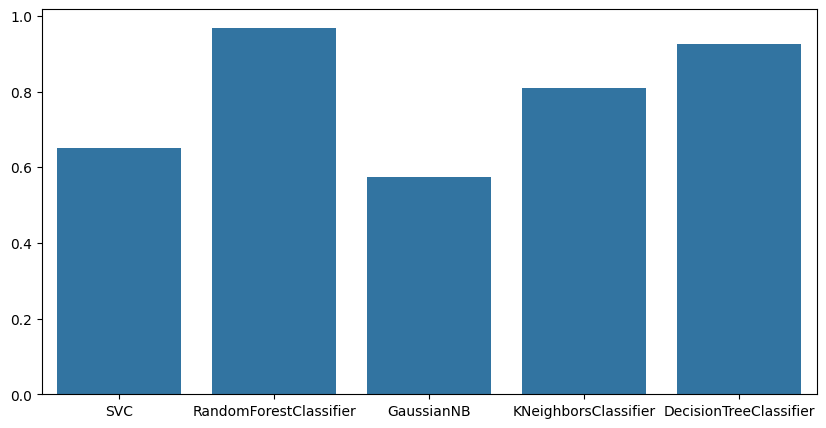

In [45]:
models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict((validationInput))
    model_acc = accuracy_score(validationTarget, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.color_palette("crest")
sns.barplot(x = titles, y=accs)

Random Forest Model


In [46]:
forestClassifier = ensemble.RandomForestClassifier(random_state=42, verbose=1)

In [47]:
paramGrid = {
    'n_estimators': [200, 300, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [48]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forestClassifier, param_grid=paramGrid, cv= 5)
clf.fit(trainInput, trainTarget)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42, verbose=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [49]:
randomForestModel = ensemble.RandomForestClassifier(criterion = 'gini',max_depth = 10, n_estimators = 300, random_state=42)

randomForestModel.fit(trainInput, trainTarget)

predictions = randomForestModel.predict(validationInput)

report = classification_report(validationTarget, predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96        86\n           1       0.97      0.95      0.96        87\n           2       1.00      1.00      1.00        85\n\n    accuracy                           0.97       258\n   macro avg       0.97      0.97      0.97       258\nweighted avg       0.97      0.97      0.97       258\n'

In [50]:
modelAcc = accuracy_score(validationTarget, predictions)
modelAcc

0.9728682170542635

Naive approach vs our model

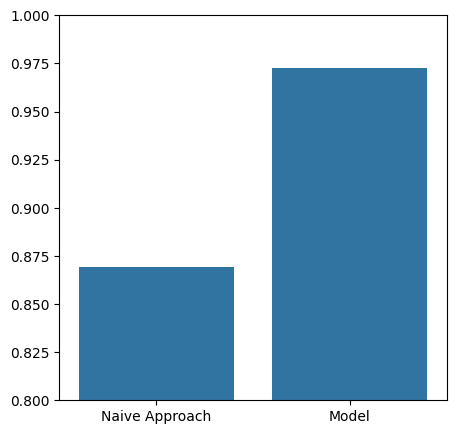

In [51]:
fig = plt.figure(figsize=(5, 5))
plt.ylim(.80, 1)
sns.set_palette("GnBu", 2)
sns.barplot(x = ['Naive Approach', 'Model'], y=[naiveAcc, modelAcc])
plt.show()

In [52]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
  pickle.dump(model, file)

In [53]:
with open('random_forest_pkl.pkl', 'rb') as file:
  model = pickle.load(file)

In [54]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 300}